In [29]:
import cv2 as cv

In [30]:
import numpy as np
import cv2
%matplotlib inline
import matplotlib.pyplot as plt

print("OpenCV-Python Version %s" % cv2.__version__)

OpenCV-Python Version 4.1.0


dtype: uint8
shape: (298, 299)


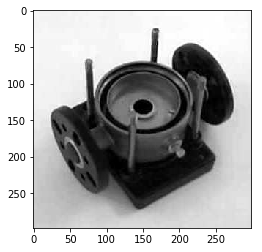

In [31]:
input_image = cv2.imread('wheel.png',cv2.IMREAD_GRAYSCALE)
print('dtype: ' +str(input_image.dtype))
print('shape: ' +str(input_image.shape))

plt.imshow(input_image, cmap='gray')

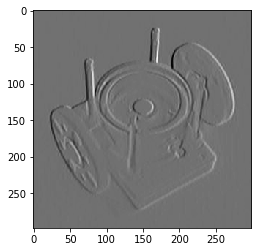

In [32]:
ddepth = cv2.CV_64F
dx = 1
dy = 0
sobelx = cv2.Sobel(input_image, ddepth, dx, dy)

plt.imshow(sobelx, cmap='gray')

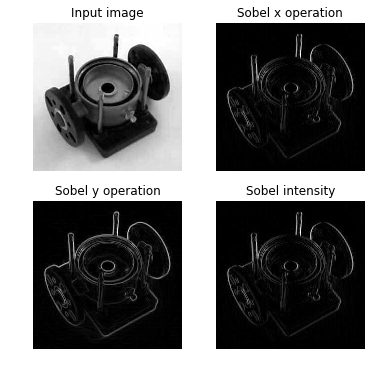

In [33]:
sobelx = cv2.Sobel(input_image, cv2.CV_64F, 1,0)
sobely = cv2.Sobel(input_image,cv2.CV_64F,0,1)
sobel=cv2.sqrt(cv2.addWeighted(cv2.pow(sobelx,2.0),
                               1.0, cv2.pow(sobely,2.0),
                               1.0,0.0))

plt.figure(figsize=(6,6));
plt.subplot(2,2,1); plt.title('Input image');plt.axis('off');
plt.imshow(input_image, cmap='gray')
plt.subplot(2,2,2);plt.title('Sobel x operation');
plt.axis('off');
plt.imshow(cv.absdiff(sobelx,0.0),cmap='gray')
plt.subplot(2,2,3);plt.title('Sobel y operation');
plt.axis('off');
plt.imshow(sobel,cmap='gray')
plt.subplot(2,2,4);plt.title('Sobel intensity');
plt.axis('off');
plt.imshow(cv.absdiff(sobelx,0.0),cmap='gray')

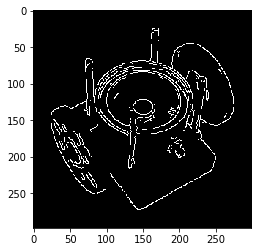

In [34]:
threshold1 = 100
threshold2 = 200
canny = cv2.Canny(input_image, threshold1, threshold2)

plt.imshow(canny, cmap='gray')

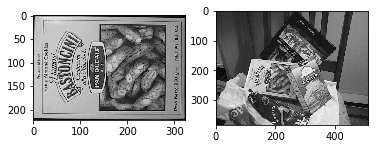

In [35]:
img1 = cv2.imread('box.png')
img2 = cv2.imread('box_in_scene.png')

plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img1,cv2.COLOR_BGR2RGB))
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB))

In [37]:
sift=cv2.xfeatures2d.SIFT_create()
gray1=cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
gray2=cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

start_time=time.time()
kp1,des1=sift.detecAndCompute(gray1,None)
kp2,des2=sift.detectAndCompute(gray2, None)
print('Elapsed time:%.6fs' %(time.time()-start_time))

prinit('Image 1 -%d feature detected' % des1.shape[0])
prinit('Image 1 -%d feature detected' % des2.shape[0])

AttributeError: module 'cv2.cv2' has no attribute 'xfeatures2d'

In [38]:
good_matches = []
for m,n in matches:
    if m.distance<0.75 * n.distance:
        good_matches.append(m)
print('%d matches' % len(good_matches))

TypeError: 'cv2.BFMatcher' object is not iterable

In [ ]:
img3 = cv2.drawMatches(img1,kp1,img2,kp2, good_matches, None)

plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))

In [ ]:
bf = cv2.BFMatcher(cv2.NORM_L2)
matches = bf.atch(des1, des2, k=2)
print('%d matches' % len(matches))

In [ ]:
print type(matches)
print len(matches)
print type(matches[0])

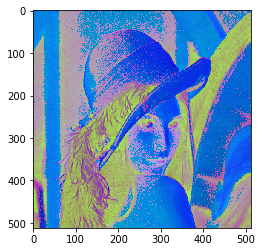

In [40]:
import numpy as np 

import matplotlib.pyplot as plt 

import cv2 

%matplotlib inline 

image = cv2.imread('Lenna.png') 

#converting image to Gray scale 

gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

#plotting the grayscale image

plt.imshow(gray_image) 

#converting image to HSV format

hsv_image = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)

#plotting the HSV image

plt.imshow(hsv_image)

True

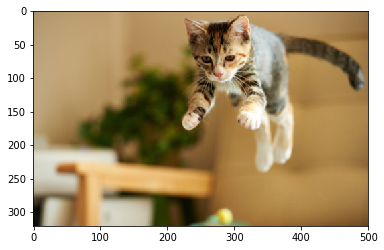

In [65]:
import numpy as np

import matplotlib.pyplot as plt

import cv2

%matplotlib inline



#reading the image 



image = cv2.imread('index.png')

image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

#plotting the image

plt.imshow(image)



#saving image

cv2.imwrite('test_write.png',image)

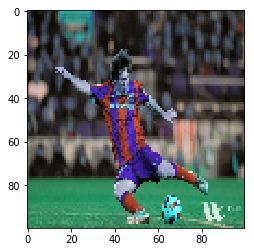

In [86]:
import cv2 

import numpy as np 

import matplotlib.pyplot as plt 

%matplotlib inline 

#reading the image 

image = cv2.imread('messi.jpg') 

#converting image to size (100,100,3) 

smaller_image = cv2.resize(image,(100,100),interpolation=50)

#plot the resized image

plt.imshow(smaller_image)

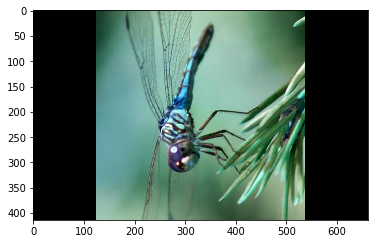

In [47]:
import numpy as np 

import cv2 

import matplotlib.pyplot as plt 

%matplotlib inline 

image = cv2.imread('dragonfly.jpg') 

rows,cols = image.shape[:2] 

#(col/2,rows/2) is the center of rotation for the image 

# M is the cordinates of the center 

M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1) 

dst = cv2.warpAffine(image,M,(cols,rows)) 

plt.imshow(dst)

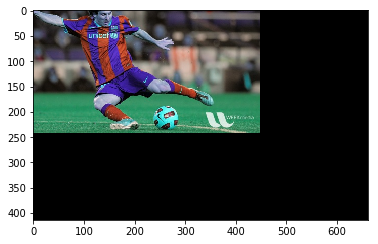

In [48]:
import numpy as np 

import cv2 

import matplotlib.pyplot as plt 

%matplotlib inline 

#reading the image

image = cv2.imread('messi.jpg')

#shifting the image 100 pixels in both dimensions

M = np.float32([[1,0,-100],[0,1,-100]]) 

dst = cv2.warpAffine(image,M,(cols,rows)) 

plt.imshow(dst)

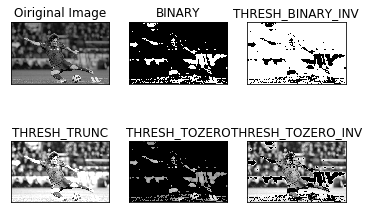

In [51]:
import numpy as np 

import cv2 

import matplotlib.pyplot as plt 

%matplotlib inline 



#here 0 means that the image is loaded in gray scale format

gray_image = cv2.imread('messi.jpg',0)



ret,thresh_binary = cv2.threshold(gray_image,127,255,cv2.THRESH_BINARY)

ret,thresh_binary_inv = cv2.threshold(gray_image,127,255,cv2.THRESH_BINARY_INV)

ret,thresh_trunc = cv2.threshold(gray_image,127,255,cv2.THRESH_TRUNC)

ret,thresh_tozero = cv2.threshold(gray_image,127,255,cv2.THRESH_TOZERO)

ret,thresh_tozero_inv = cv2.threshold(gray_image,127,255,cv2.THRESH_TOZERO_INV)



#DISPLAYING THE DIFFERENT THRESHOLDING STYLES

names = ['Oiriginal Image','BINARY','THRESH_BINARY_INV','THRESH_TRUNC','THRESH_TOZERO','THRESH_TOZERO_INV']

images = gray_image,thresh_binary,thresh_binary_inv,thresh_trunc,thresh_tozero,thresh_tozero_inv



for i in range(6):

    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')

    plt.title(names[i])

    plt.xticks([]),plt.yticks([])

plt.show()

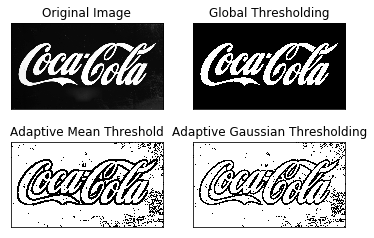

In [53]:
import numpy as np

import matplotlib.pyplot as plt

import cv2

%matplotlib inline



#ADAPTIVE THRESHOLDING

gray_image = cv2.imread('logo.jpg',0)



ret,thresh_global = cv2.threshold(gray_image,127,255,cv2.THRESH_BINARY)

#here 11 is the pixel neighbourhood that is used to calculate the threshold value

thresh_mean = cv2.adaptiveThreshold(gray_image,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)



thresh_gaussian = cv2.adaptiveThreshold(gray_image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)



names = ['Original Image','Global Thresholding','Adaptive Mean Threshold','Adaptive Gaussian Thresholding']

images = [gray_image,thresh_global,thresh_mean,thresh_gaussian]



for i in range(4):

    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')

    plt.title(names[i])

    plt.xticks([]),plt.yticks([])

    

plt.show()

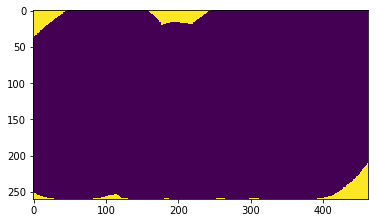

In [54]:
import numpy as np

import cv2

import matplotlib.pyplot as plt



#reading the image

image = cv2.imread('logo.jpg')

#converting image to grayscale format

gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

#apply thresholding

ret,thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

#get a kernel

kernel = np.ones((3,3),np.uint8)

opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations = 2)

#extract the background from image

sure_bg = cv2.dilate(opening,kernel,iterations = 3)



dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)

ret,sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)



sure_fg = np.uint8(sure_fg)

unknown = cv2.subtract(sure_bg,sure_bg)



ret,markers = cv2.connectedComponents(sure_fg)



markers = markers+1



markers[unknown==255] = 0



markers = cv2.watershed(image,markers)

image[markers==-1] = [255,0,0]



plt.imshow(sure_fg)

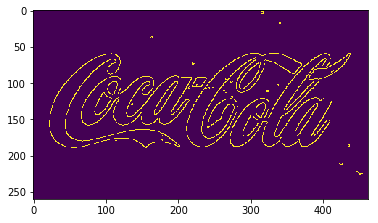

In [67]:
#import the required libraries

import numpy as np 

import cv2 

import matplotlib.pyplot as plt 

%matplotlib inline

#read the image

image = cv2.imread('logo.jpg') 

#calculate the edges using Canny edge algorithm

edges = cv2.Canny(image,100,200) 

#plot the edges

plt.imshow(edges)

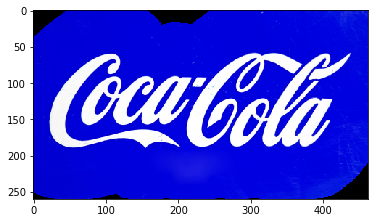

In [68]:

#import required libraries

import numpy as np 

import matplotlib.pyplot as plt 

import cv2 

%matplotlib inline 

#read the image

image = cv2.imread('logo.jpg')

#apply thresholdin 

ret,mask = cv2.threshold(sure_fg,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU) 

#apply AND operation on image and mask generated by thrresholding

final = cv2.bitwise_and(image,image,mask = mask) 

#plot the result

plt.imshow(final)

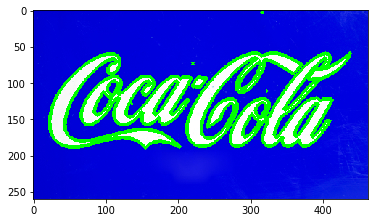

In [95]:
import numpy as np 

import cv2 

import matplotlib.pyplot as plt 

%matplotlib inline 

image = cv2.imread('logo.jpg') 

#converting RGB image to Binary 

gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY) 

ret,thresh = cv2.threshold(gray_image,127,255,0) 

#calculate the contours from binary image

contours,hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE) 

with_contours = cv2.drawContours(image,contours,-1,(0,255,0),3) 

plt.imshow(with_contours)

In [100]:
%matplotlib inline
import cv2
import matplotlib
from matplotlib import colors
from matplotlib import pyplot as plt
import numpy as np
from __future__ import division

In [142]:
def show(image):
# Figure size in inches
    plt.figure(figsize=(15, 15))

# Show image, with nearest neighbour interpolation
    plt.imshow(image, interpolation='nearest')

def show_hsv(hsv):
    rgb = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    show(rgb)

def show_mask(mask):
    plt.figure(figsize=(10, 10))
    plt.imshow(mask, cmap='gray')

def overlay_mask(mask, image):
    rgb_mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)
    img = cv2.addWeighted(rgb_mask, 0.5, image, 0.5, 0)
    show(img)

In [143]:
image = cv2.imread('download.png')

In [144]:
if image is None:
    print("its none image")

In [145]:
image.shape

(590, 874, 3)

In [146]:
import pandas as pd
m,n,r = image.shape
arr = image.reshape(m*n,-1)
df = pd.DataFrame(arr, columns=['b','g','r'])
df.describe()

,b,g,r
count,515660.000000,515660.000000,515660.000000
mean,77.656785,116.265343,122.368087
std,63.789799,60.479726,59.586003
min,0.000000,0.000000,0.000000
25%,37.000000,78.000000,87.000000
50%,63.000000,114.000000,112.000000
75%,91.000000,144.000000,141.000000
max,255.000000,255.000000,255.000000


In [147]:
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

image=cv2.resize(image,None,fx=1/5,fy=1/3)

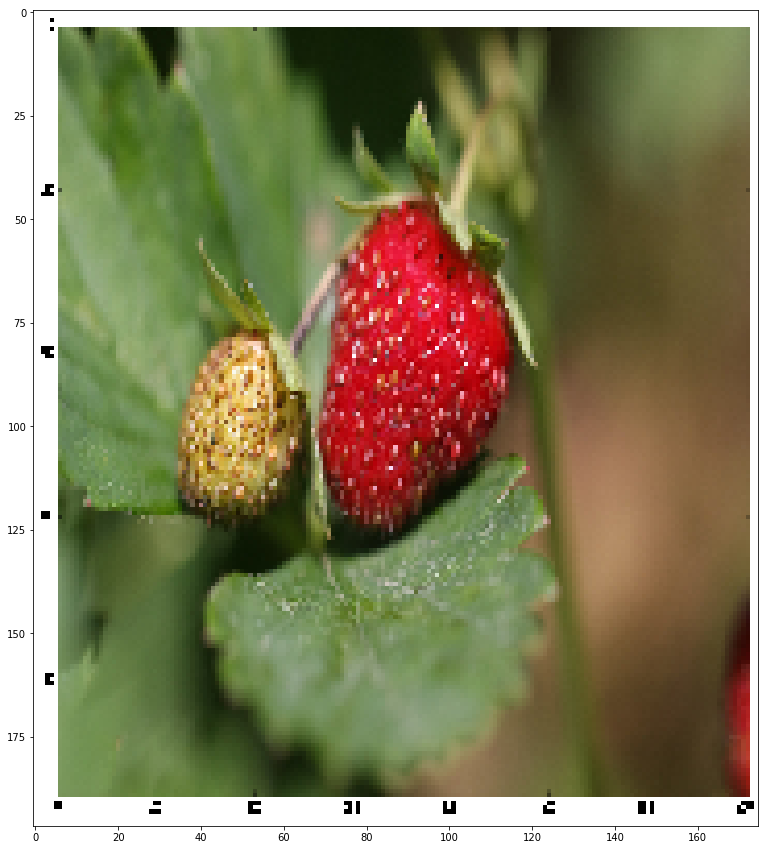

In [148]:
show(image)

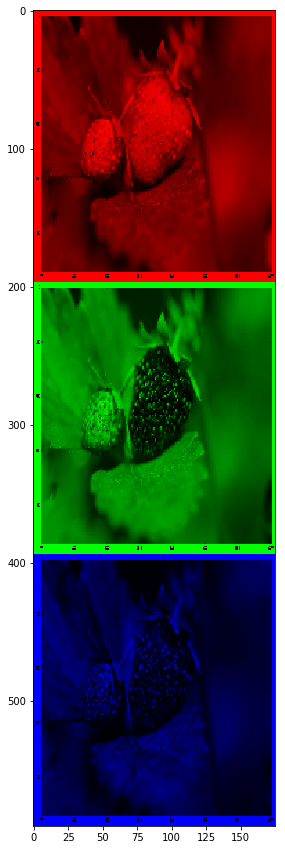

In [149]:
images = []
for i in [0, 1, 2]:
    colour = image.copy()
    if i != 0: colour[:,:,0] = 0
    if i != 1: colour[:,:,1] = 0
    if i != 2: colour[:,:,2] = 0
    images.append(colour)

show(np.vstack(images))

TypeError: only size-1 arrays can be converted to Python scalars

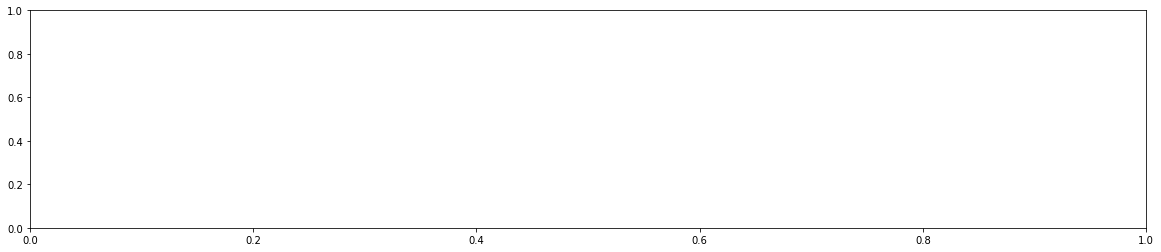

In [153]:
def show_rgb_hist(image):
    colours = ('r','g','b')
    for i, c in enumerate(colours):
        plt.figure(figsize=(20, 4))
        histr = cv2.calcHist([image], [i], None, [256], [0, 256])
#         plt.plot(histr, color=c, lw=2)
        
        if c == 'r': colours = [((i/256, 0, 0)) for i in range(0, 256)]
        if c == 'g': colours = [((0, i/256, 0)) for i in range(0, 256)]
        if c == 'b': colours = [((0, 0, i/256)) for i in range(0, 256)]
        
        plt.bar(range(0, 256), histr, color=colours, edgecolor=colours, width=1)
#         plt.xlim([0, 256])
 
        plt.show()
    
show_rgb_hist(image)

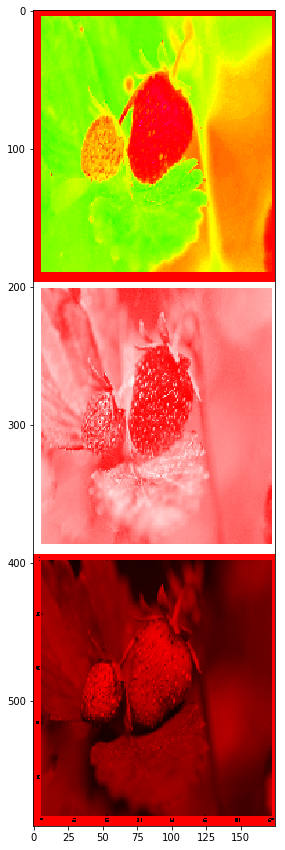

In [152]:
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

images = []
for i in [0, 1, 2]:
    colour = hsv.copy()
    if i != 0: colour[:,:,0] = 0
    if i != 1: colour[:,:,1] = 255
    if i != 2: colour[:,:,2] = 255
    images.append(colour)

hsv_stack = np.vstack(images)
rgb_stack = cv2.cvtColor(hsv_stack, cv2.COLOR_HSV2RGB)
show(rgb_stack)

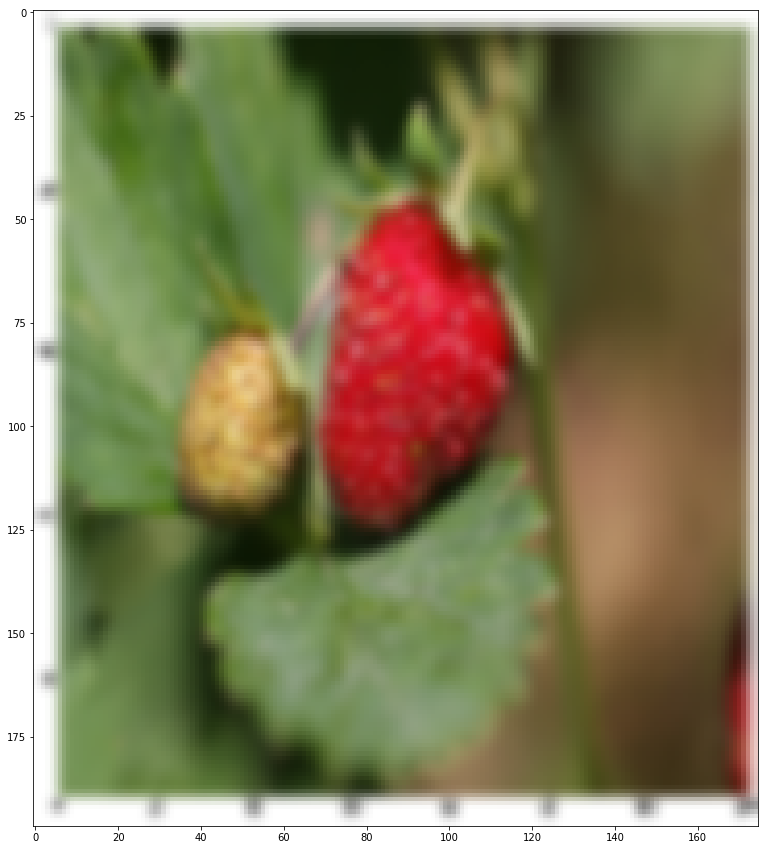

In [154]:
image_blur = cv2.GaussianBlur(image, (7, 7), 0)
show(image_blur)

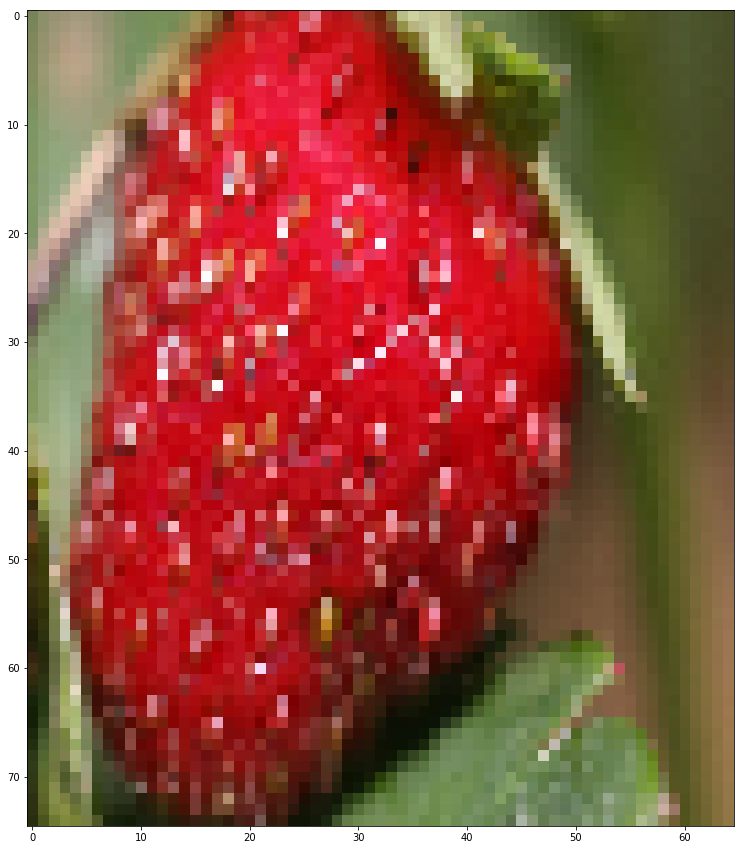

In [161]:
image_cropped = image[50:125,65:130]
show(image_cropped)

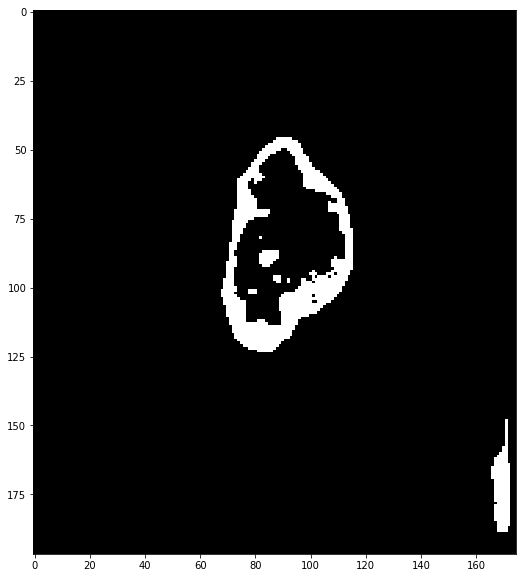

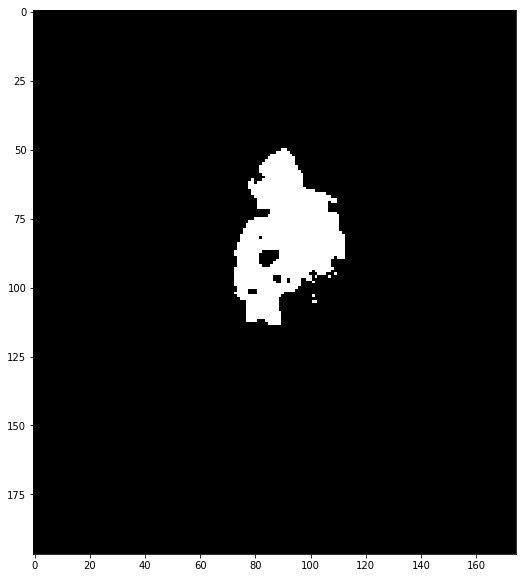

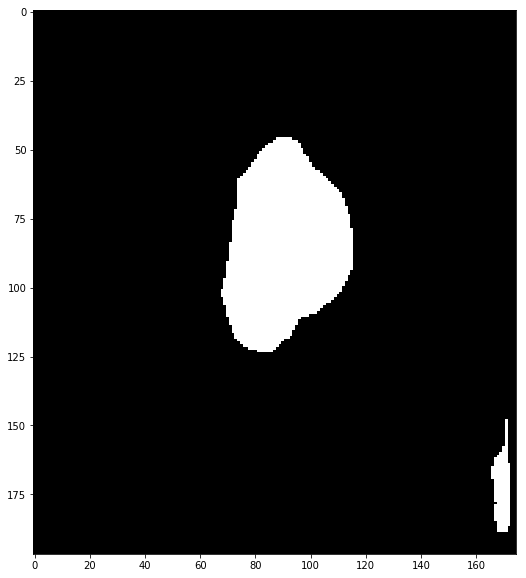

In [162]:
image_blur_hsv = cv2.cvtColor(image_blur, cv2.COLOR_RGB2HSV)

# 0-10 hue
min_red = np.array([0, 100, 80])
max_red = np.array([10, 256, 256])
image_red1 = cv2.inRange(image_blur_hsv, min_red, max_red)

# 170-180 hue
min_red2 = np.array([170, 100, 80])
max_red2 = np.array([180, 256, 256])
image_red2 = cv2.inRange(image_blur_hsv, min_red2, max_red2)

show_mask(image_red1)
show_mask(image_red2)
image_red = image_red1 + image_red2
show_mask(image_red)

In [163]:
image_red

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

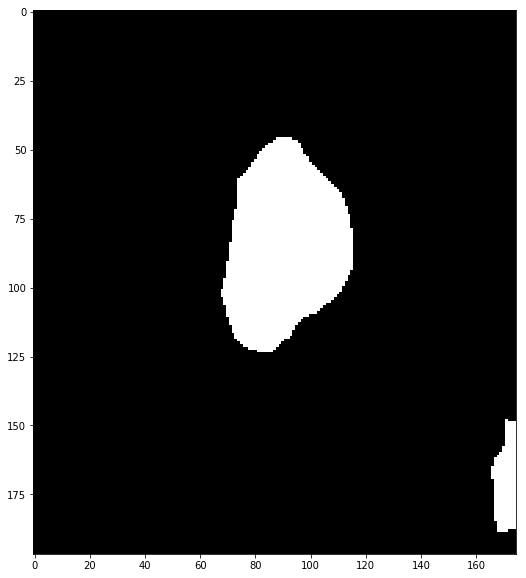

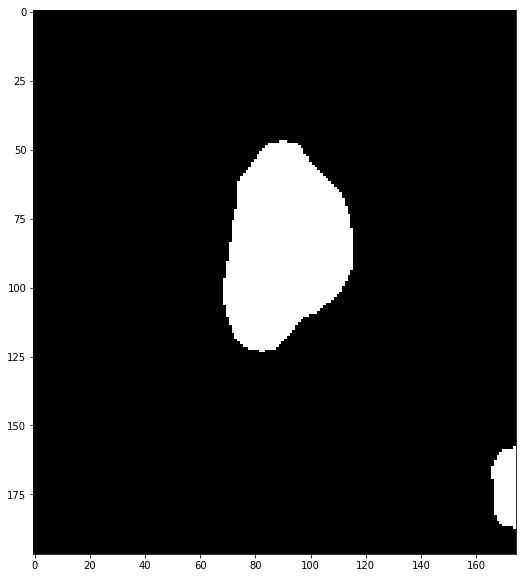

In [164]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15))

# image_red_eroded = cv2.morphologyEx(image_red, cv2.MORPH_ERODE, kernel)
# show_mask(image_red_eroded)

# image_red_dilated = cv2.morphologyEx(image_red, cv2.MORPH_DILATE, kernel)
# show_mask(image_red_dilated)

# image_red_opened = cv2.morphologyEx(image_red, cv2.MORPH_OPEN, kernel)
# show_mask(image_red_opened)

# Fill small gaps
image_red_closed = cv2.morphologyEx(image_red, cv2.MORPH_CLOSE, kernel)
show_mask(image_red_closed)

# Remove specks
image_red_closed_then_opened = cv2.morphologyEx(image_red_closed, cv2.MORPH_OPEN, kernel)
show_mask(image_red_closed_then_opened)

2


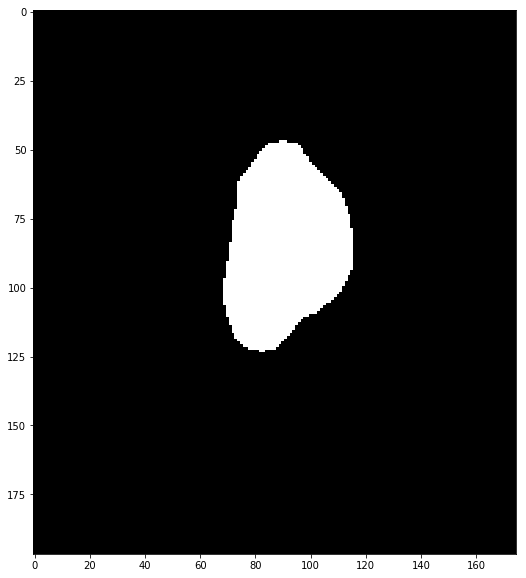

In [180]:
def find_biggest_contour(image):

# Copy to prevent modification
    image = image.copy()
    contours, hierarchy = cv2.findContours(image, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    print(len(contours))

# Isolate largest contour
    contour_sizes = [(cv2.contourArea(contour), contour) for contour in contours]
    biggest_contour = max(contour_sizes, key=lambda x: x[0])[1]

    mask = np.zeros(image.shape, np.uint8)
    cv2.drawContours(mask, [biggest_contour], -1, 255, -1)
    return biggest_contour, mask

big_contour, red_mask = find_biggest_contour(image_red_closed_then_opened)
show_mask(red_mask)

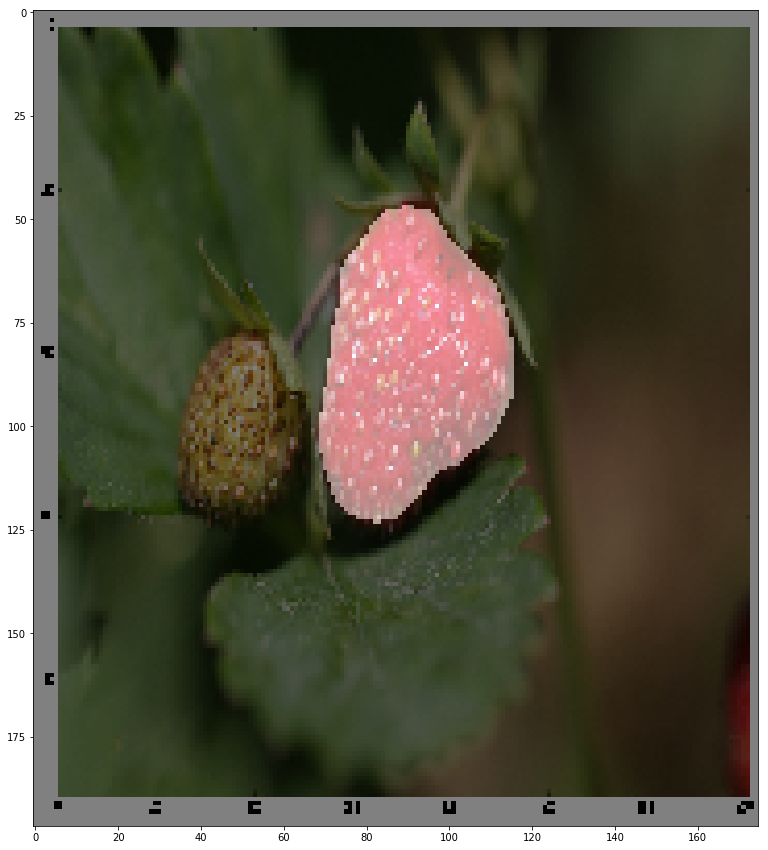

In [181]:
overlay_mask(red_mask, image)

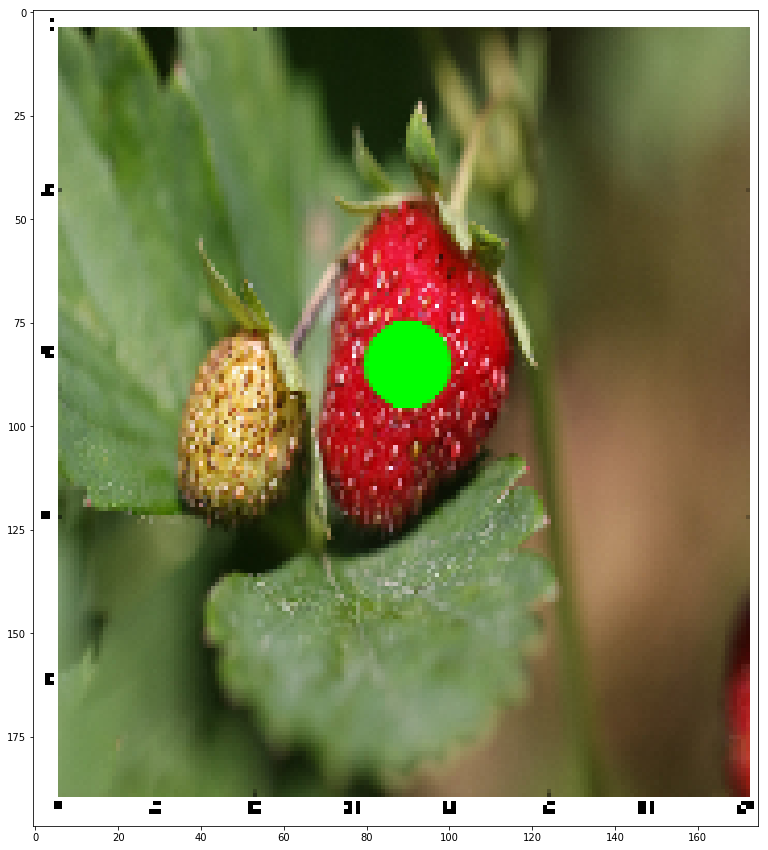

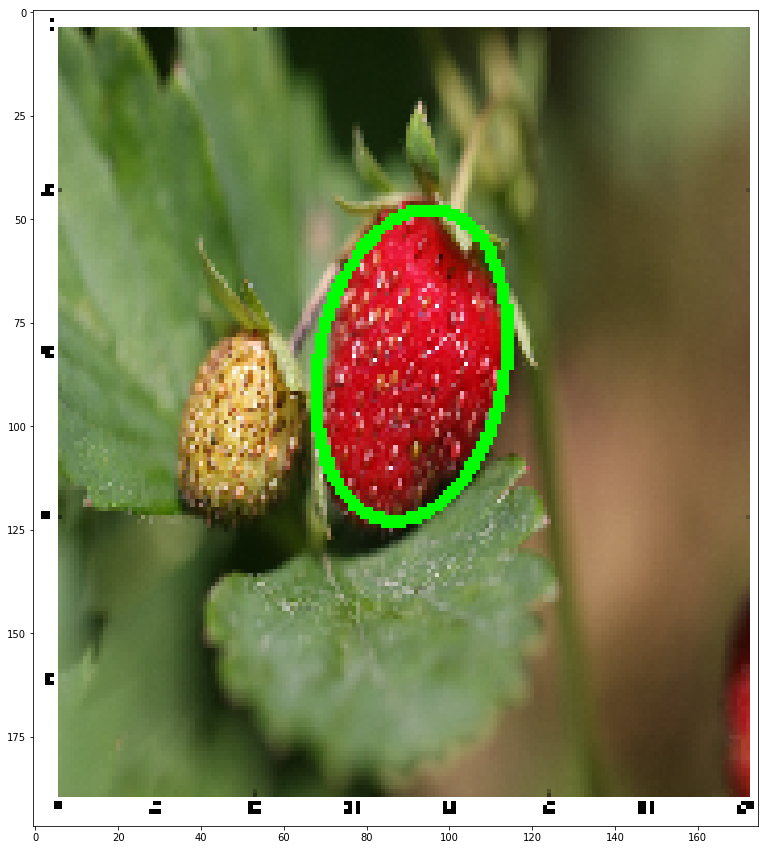

In [188]:
# Centre of mass
moments = cv2.moments(red_mask)
centre_of_mass = int(moments['m10'] / moments['m00']), int(moments['m01'] / moments['m00'])
image_with_com = image.copy()
cv2.circle(image_with_com, centre_of_mass, 10, (0, 255, 0), -1, cv2.LINE_AA)
show(image_with_com)

# Bounding ellipse
image_with_ellipse = image.copy()
ellipse = cv2.fitEllipse(big_contour)
cv2.ellipse(image_with_ellipse, ellipse, (0,255,0), 2)
show(image_with_ellipse)